In [47]:
import pandas as pd
df=pd.read_csv('/Users/adwaita/Desktop/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [48]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [49]:
df.dropna(how='any',inplace=True)

In [51]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [52]:
inputs=df.drop('Survived',axis='columns')
y=df['Survived']

In [53]:
y.isna().any()

False

In [56]:
from sklearn.preprocessing import LabelEncoder
le_pclass = LabelEncoder()
le_age = LabelEncoder()
le_sex = LabelEncoder()
le_fare = LabelEncoder()

In [58]:
inputs['Pclass_n']=le_pclass.fit_transform(inputs['Pclass'])
inputs['Age_n']=le_pclass.fit_transform(inputs['Age'])
inputs['Sex_n']=le_pclass.fit_transform(inputs['Sex'])
inputs['Fare_n']=le_pclass.fit_transform(inputs['Fare'])
inputs

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_n,Age_n,Sex_n,Fare_n
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,32,0,57
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,28,0,44
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,49,1,41
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,2,4,0,10
11,12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,53,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,0,42,0,43
872,873,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,0,26,1,1
879,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,0,51,0,68
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,12,0,23


In [59]:
X=inputs.drop(['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis='columns')

In [60]:
X.isna().any()

Pclass_n    False
Age_n       False
Sex_n       False
Fare_n      False
dtype: bool

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [63]:
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion='entropy')

In [64]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [66]:
model.score(x_train,y_train)

1.0

In [68]:
y_pred=model.predict(x_test)
y_pred_train=model.predict(x_train)

In [70]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.6557377049180327


In [71]:
print(accuracy_score(y_train,y_pred_train))

1.0


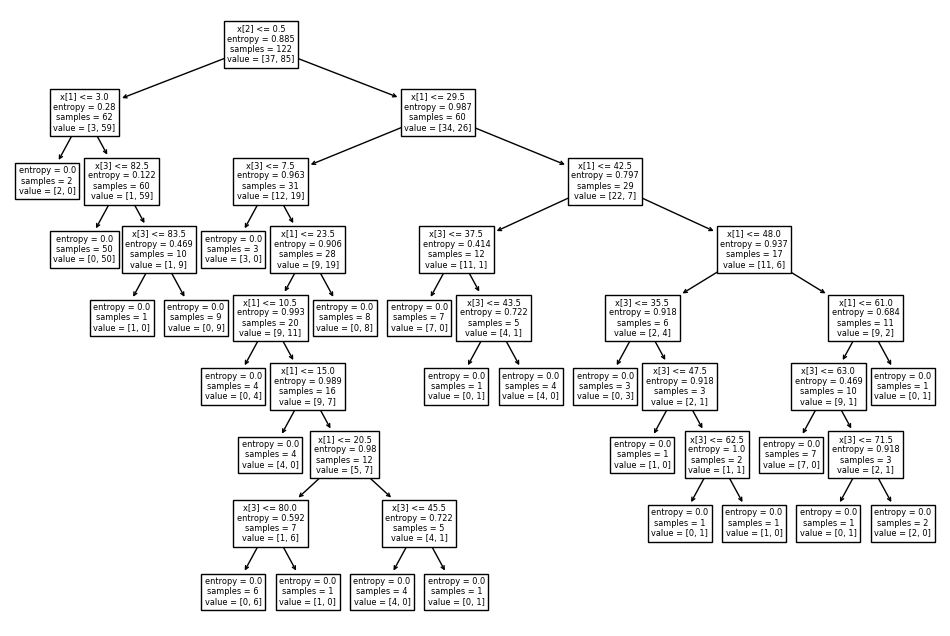

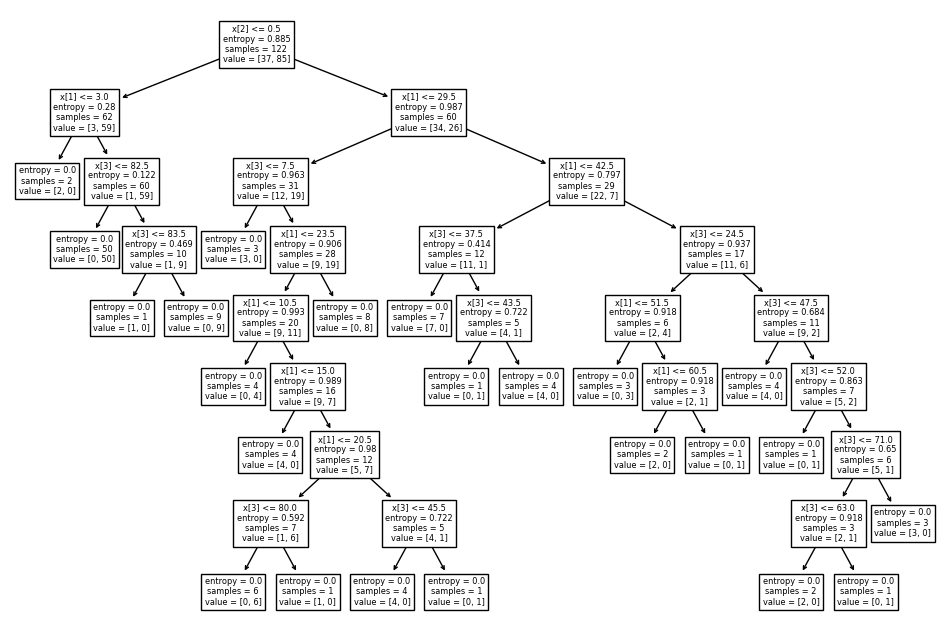

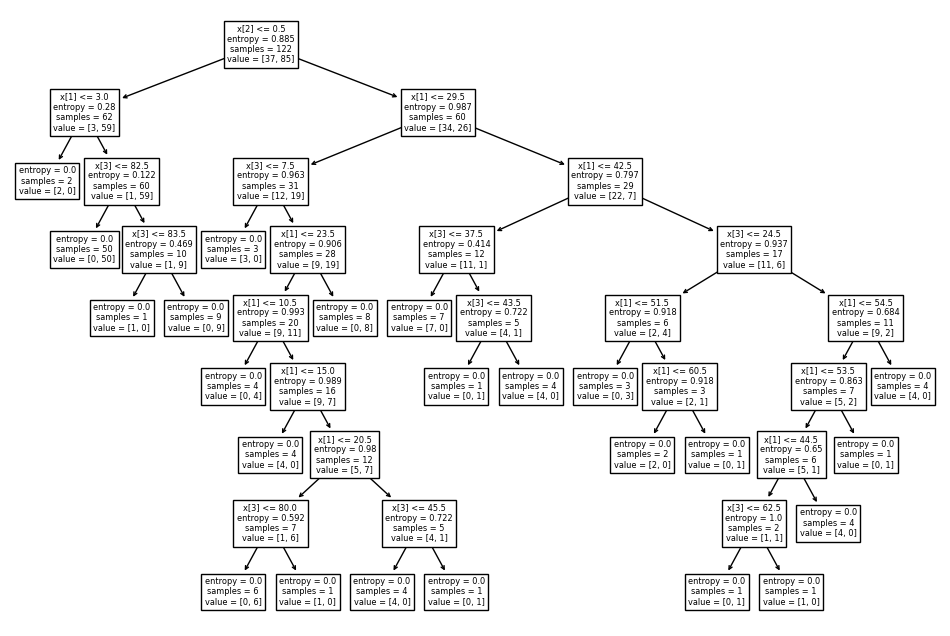

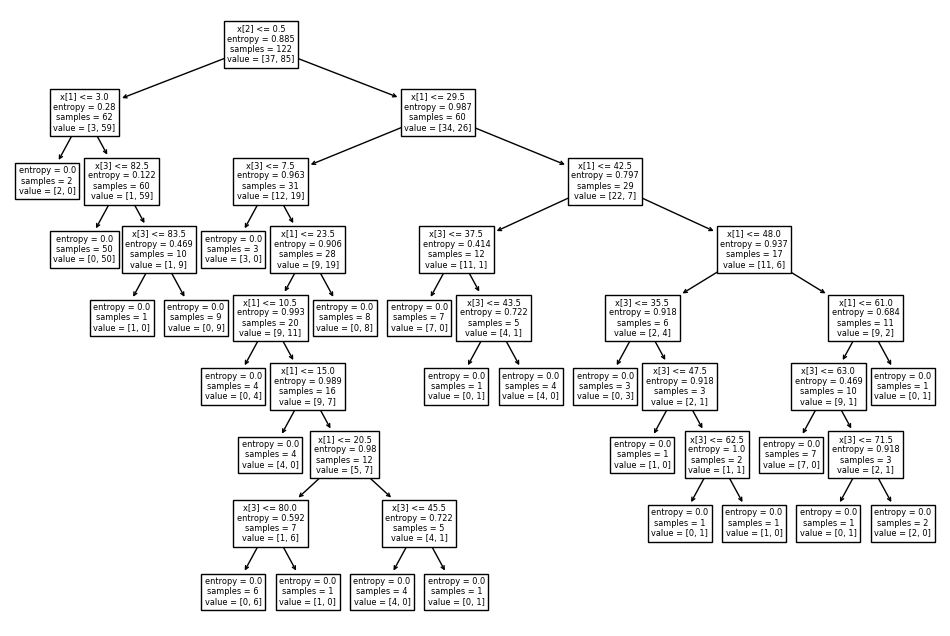

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(model.fit(x_train,y_train))
plt.show()